# MNIST Neural Network with Explanations and Images
This notebook loads data directly from **TensorFlow Keras Datasets**, which hosts a copy of the MNIST dataset on Google servers. TensorFlow automatically downloads it the first time you run the code.

## 1. Load and Inspect the MNIST Dataset
The dataset contains 60,000 training images and 10,000 test images of handwritten digits (0–9).

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data (downloaded automatically by TensorFlow)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28))

### Visualize sample images

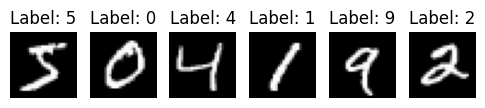

In [3]:
plt.figure(figsize=(6,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## 2. Preprocess Data

### Normalize pixel values and convert labels to one-hot encoding

### Normalize pixel values

MNIST images contain pixel values between 0 and 255, where  
- 0 means black  
- 255 means white  
- values in between represent shades of gray  

Neural networks train better when input values are small, usually in the range 0 to 1.  
To achieve this, we divide each pixel by 255:

```
x_train = x_train / 255.0
x_test  = x_test  / 255.0
```

This maps the original values as follows:  
- 0 becomes 0.0  
- 255 becomes 1.0  
- 128 becomes 0.50  

Normalizing improves training stability and helps gradient descent converge faster.

---

### Convert labels to one-hot encoding

The original MNIST labels are integers from 0 to 9.  
However, the neural network outputs a probability distribution over 10 possible classes using a softmax layer.  
For training, the true label must also be represented as a vector of length 10, with a 1 in the position of the correct class and 0 elsewhere.

Example:

Label:
```
3
```

One-hot encoded label:
```
[0,0,0,1,0,0,0,0,0,0]
```

This transformation is done with:

```
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)
```

One-hot encoding is required because the categorical cross-entropy loss function expects the target label to be a vector rather than a single integer.


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

## 3. Build the Neural Network

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/home/cris/Documents/College/eight/arep/ml_bootcamp/ml_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-02-04 15:07:31.682883: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the Model

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5. Train the Model

In [7]:
history = model.fit(x_train, y_train_oh, epochs=3, batch_size=32)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9268 - loss: 0.2554
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1139
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0776


## 6. Evaluate the Model

In [8]:
loss, acc = model.evaluate(x_test, y_test_oh)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0852


0.9728000164031982

## 7. Predict on Test Images and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


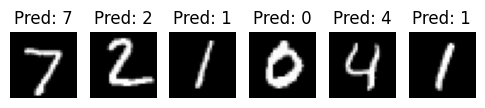

In [9]:
import numpy as np

preds = model.predict(x_test[:6])
plt.figure(figsize=(6,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(preds[i])}")
    plt.axis('off')
plt.show()